**Columns**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
#importing the relevant library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#reading the data

raw_data = pd.read_csv('../input/insurance/insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Looking for no. of missing value in each column
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We don't have any missing value in dataset

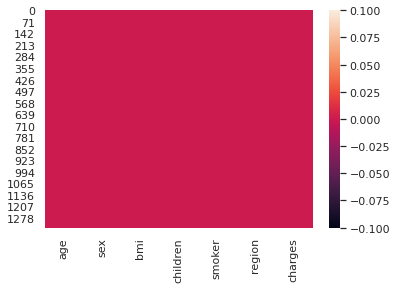

In [4]:
#checking for missing value by heatmap

sns.heatmap(raw_data.isnull(),cbar=True)

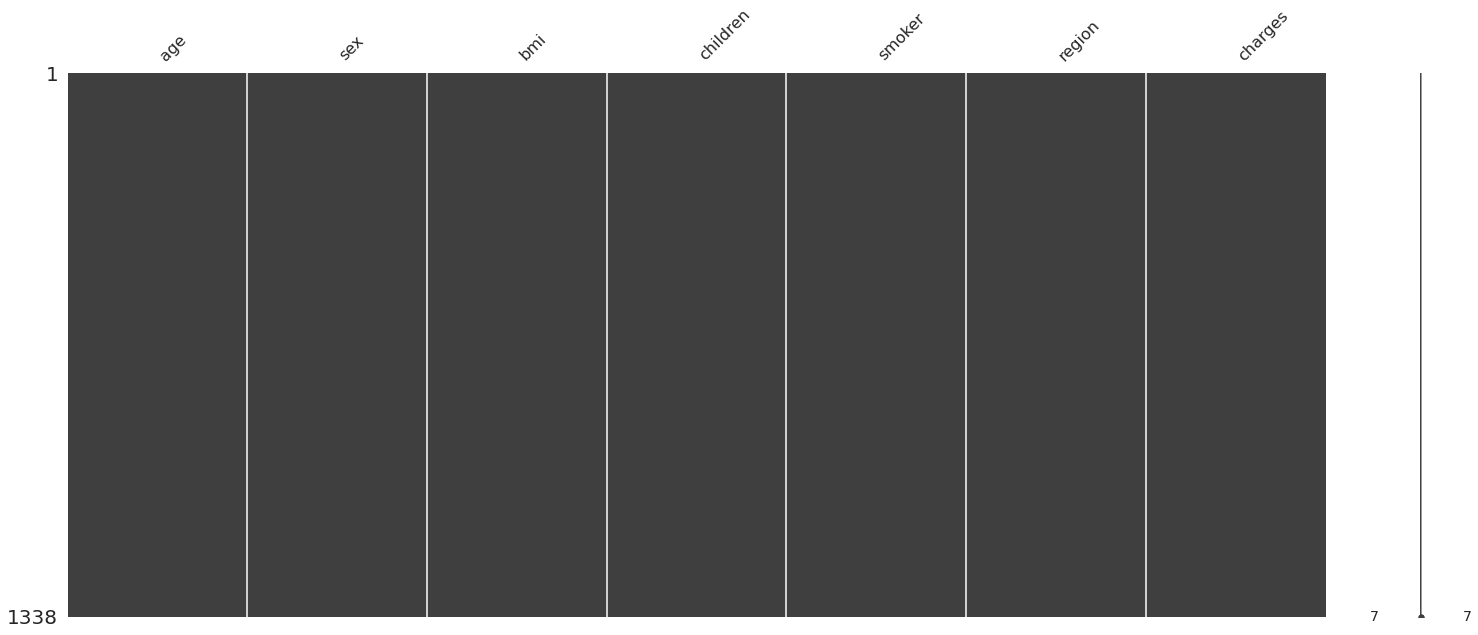

In [5]:
# Some other tools to check for missing value
from missingno import matrix,heatmap
matrix(raw_data)

In [6]:
# Number of male and female patient  
raw_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

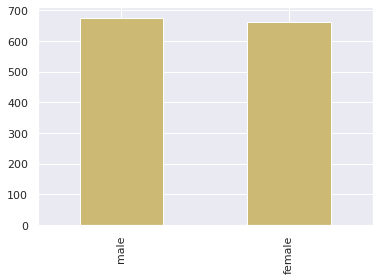

In [7]:
raw_data['sex'].value_counts().plot.bar(color='y')

No. of Male and Female Paitent are almost equal.

In [8]:
raw_data['age'].value_counts().sort_values(ascending=False)

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
49    28
28    28
27    28
21    28
22    28
23    28
26    28
24    28
25    28
53    28
54    28
29    27
31    27
30    27
43    27
44    27
40    27
42    27
41    27
55    26
33    26
32    26
56    26
34    26
57    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

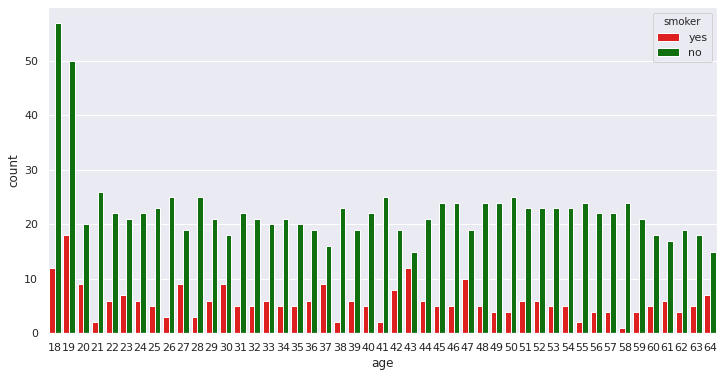

In [9]:
fig = plt.figure(figsize=(12,6))
sns.countplot(raw_data['age'],hue=raw_data['smoker'],palette=['red','green'],)

In [10]:
#Check Point
df = raw_data.copy()

In [11]:
# Encoding the data with map function

df['sex'] = raw_data['sex'].map({'female':0,'male':1})
df['smoker'] = raw_data['smoker'].map({'yes':1,'no':0})
df['region'] = raw_data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [12]:
raw_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


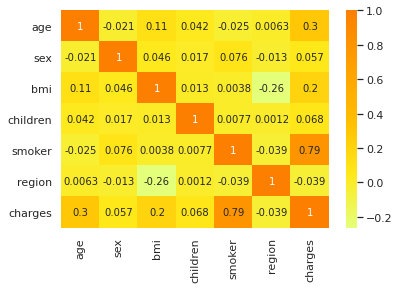

In [14]:
sns.heatmap(df.corr(),cmap='Wistia',annot=True)

Only Smoker is highly correleted to charges and other is having low or no correlection

In [15]:
# Check Point 2
df2 = raw_data.copy()
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df2['region'] = lb.fit_transform(df2['region'])
df2['sex'] = lb.fit_transform(df2['sex'])
df2['smoker'] = lb.fit_transform(df2['smoker'])
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
# Check point encoding
df3 = raw_data.copy()
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
## Using OneHotEncoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
x = pd.DataFrame(ohe.fit_transform(df3[['sex','children','smoker','region']]).toarray())
x.columns = ['Male','children_1','children_2','children_3','children_4','children_5','smoker','northwest','southeast','southwest']
df4 = pd.concat([df3.drop(['sex','children','smoker','region'],axis=1),x],axis=1)
df4.head()

,age,bmi,charges,Male,children_1,children_2,children_3,children_4,children_5,smoker,northwest,southeast,southwest
0,19,27.900,16884.92400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1725.55230,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


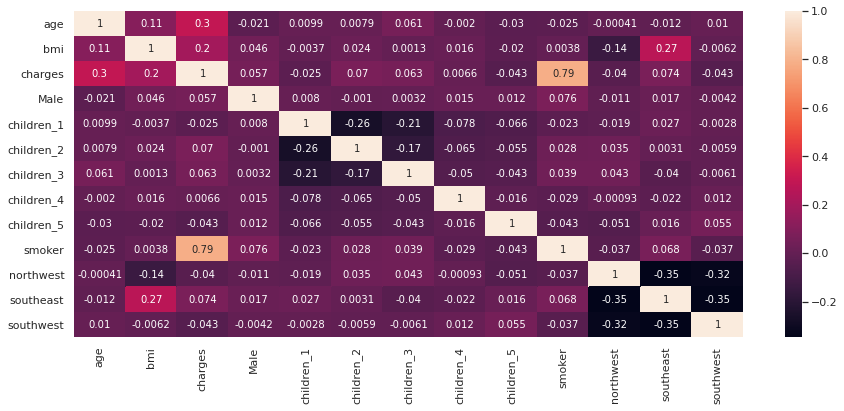

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df4.corr(),annot=True)

In [20]:
## Creating the check Point
new_data = df4

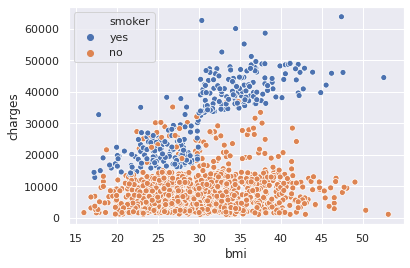

In [21]:
sns.scatterplot(x=raw_data['bmi'],y=raw_data['charges'],hue=raw_data['smoker'])

Person with smoking addiction seems to have more charges to paid at medical treatment

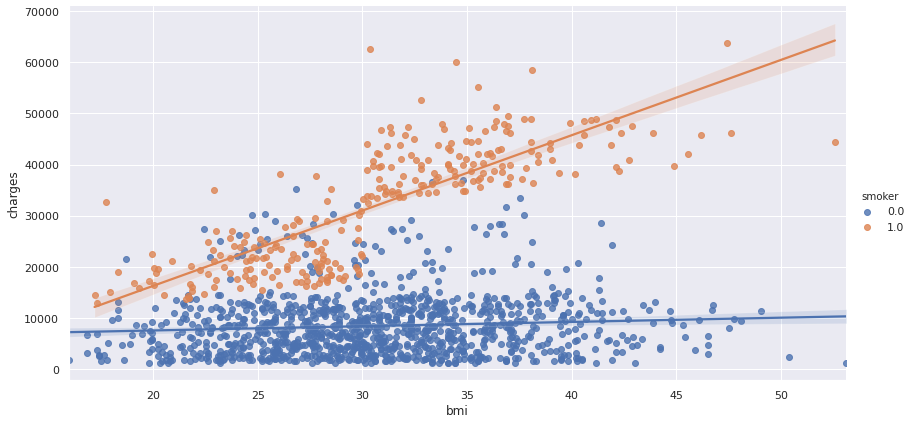

In [22]:
sns.lmplot(data=df4,x='bmi',y='charges',aspect=2,height=6,hue='smoker')

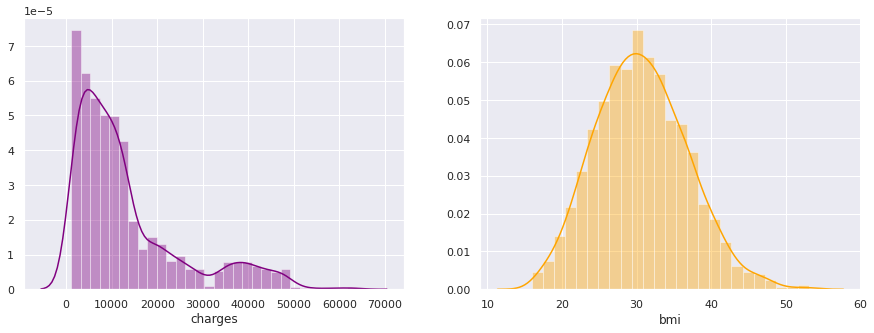

In [23]:
# Looking for continous variable

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(df4['charges'],ax=axes[0],color='purple')
sns.distplot(df4['bmi'],ax=axes[1],color='orange')

Average charges at 10000 to 20000 and are right skewed. and BMI is normally distrubuted

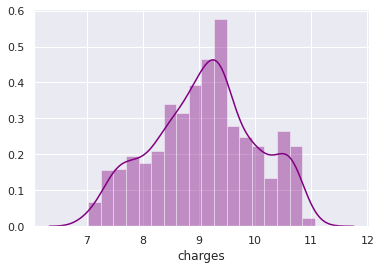

In [24]:
# 
sns.distplot(np.log(df4['charges']),color='purple')

In [25]:
df4.columns

Index(['age', 'bmi', 'charges', 'Male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [26]:
# Checkin point applying linear regression

new_data = df4.copy()
new_data = new_data.reindex(['age', 'bmi', 'Male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker', 'northwest',
       'southeast', 'southwest','charges'],axis=1)
new_data.head()

,age,bmi,Male,children_1,children_2,children_3,children_4,children_5,smoker,northwest,southeast,southwest,charges
0,19,27.900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3866.85520


In [27]:
import statsmodels.api as sm
x1 = new_data.iloc[:,:-1] # independent variable
y = new_data.iloc[:,-1] #dependent variable

In [28]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:27:29   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.193e+04    993.657    -12.003      0.000   -1.39e+04   -9977.861
age          257.1933     11.914     21.587      0.000     233.820     280.567
bmi          336.9088     28.612     11.775      0.000     280.779     393.039
Male        -128.1616    332.834     -0.385      0.700    -781.101     524.778
children_1   390.9782    421.350      0.928      0.354    -435.608    1217.565
children_2  1635.7772    466.670      3.505      0.000     720.284    2551.270
children_3   964.3403    548.097      1.759      0.079    -110.893    2039.574
children_4  2947.3680   1239.163      2.379      0.018     516.432    5378.304
children_5  1116.0395   1456.015      0.767      0.444   -1740.307    3972.386
smoker      2.384e+04    414.139     57.557      0.000     2.3e+04    2.46e+04
northwest   -380.0439    476.559     -0.797      0.425   -1314.936     554.848
southeast  -1033.1375    479.139     -2.156      0.031   -1973.091     -93.184
southwest   -952.8878    478.153     -1.993      0.046   -1890.908     -14.867
==============================================================================
Omnibus:                      293.990   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.789
Skew:                           1.191   Prob(JB):                    8.15e-152
Kurtosis:                       5.609   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adjusted R^2

Our model explain about 75% variability of data.

Looking for P-values:
*  it is the smallest level of significane at which we can still reject the null hypothesis.
* The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. 


for Significane Level of 0.05
*  p-value < 0.05 --> reject the null hypothesis
*  p-value > 0.05  --> cannot reject the null hypthesis

After performing Backward elimination and Multiple Linear regression with Significant Value=0.05,
I got predictive variable as folowing:
* Age
* BMI
* Smoker
___________________________________________________________________
___________________________________________________________________

1. **Children** features donot seem to be good predictive variable as it is for some it predict and others for not.
2. **Region** features also seem to have low predictive power.
3. **Sex** features donot seem to be not a good predictive as both are having almost number in dataset.